# Introduction
### In this project I'm discussing the difference between the predicting power of the Random forest in comparion with the Decision Tree & Linear regression 
### I'm using mean_absolute error , r_squared as my KPIs 

In [ ]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline 

In [2]:
data=pd.read_csv('train (4).csv') #loading dataset

In [3]:
data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [4]:
data.isnull().sum() #searching for null values

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive

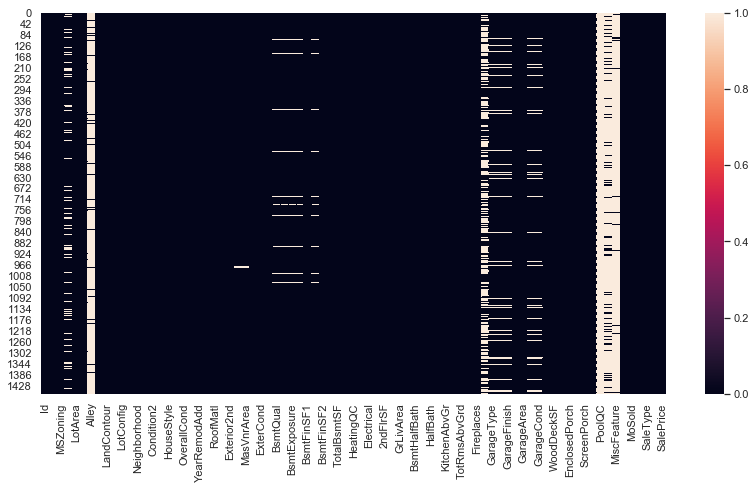

In [7]:
plt.figure(figsize=(14,7)) #visualizing the null values 
sns.heatmap(data.isnull())

In [8]:
columns_to_drop=['MiscFeature','Fence','PoolQC','FireplaceQu','Alley','Id','GarageCond','GarageQual','GarageFinish','GarageYrBlt','GarageType','LotFrontage']

In [10]:
data.drop(columns_to_drop,axis=1,inplace=True) #dropping the unnecessary values

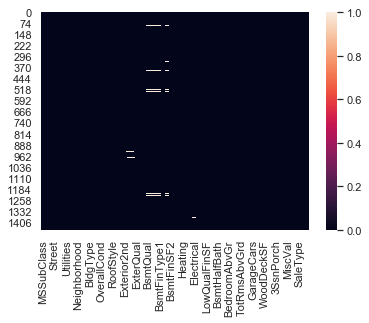

In [11]:
sns.heatmap(data.isnull())

In [13]:
data=data.dropna(axis=0) #dropping the missing rows 

In [14]:
data.head()

MSSubClass MSZoning  LotArea Street LotShape LandContour Utilities  \
0          60       RL     8450   Pave      Reg         Lvl    AllPub   
1          20       RL     9600   Pave      Reg         Lvl    AllPub   
2          60       RL    11250   Pave      IR1         Lvl    AllPub   
3          70       RL     9550   Pave      IR1         Lvl    AllPub   
4          60       RL    14260   Pave      IR1         Lvl    AllPub   

  LotConfig LandSlope Neighborhood  ... EnclosedPorch 3SsnPorch ScreenPorch  \
0    Inside       Gtl      CollgCr  ...             0         0           0   
1       FR2       Gtl      Veenker  ...             0         0           0   
2    Inside       Gtl      CollgCr  ...             0         0           0   
3    Corner       Gtl      Crawfor  ...           272         0           0   
4       FR2       Gtl      NoRidge  ...             0         0           0   

  PoolArea  MiscVal  MoSold  YrSold  SaleType SaleCondition SalePrice  
0        0        0       2    2008        WD        Normal    208500  
1        0        0       5    2007        WD        Normal    181500  
2        0        0       9    2008        WD        Normal    223500  
3        0        0       2    2006        WD       Abnorml    140000  
4        0        0      12    2008        WD        Normal    250000  

[5 rows x 69 columns]

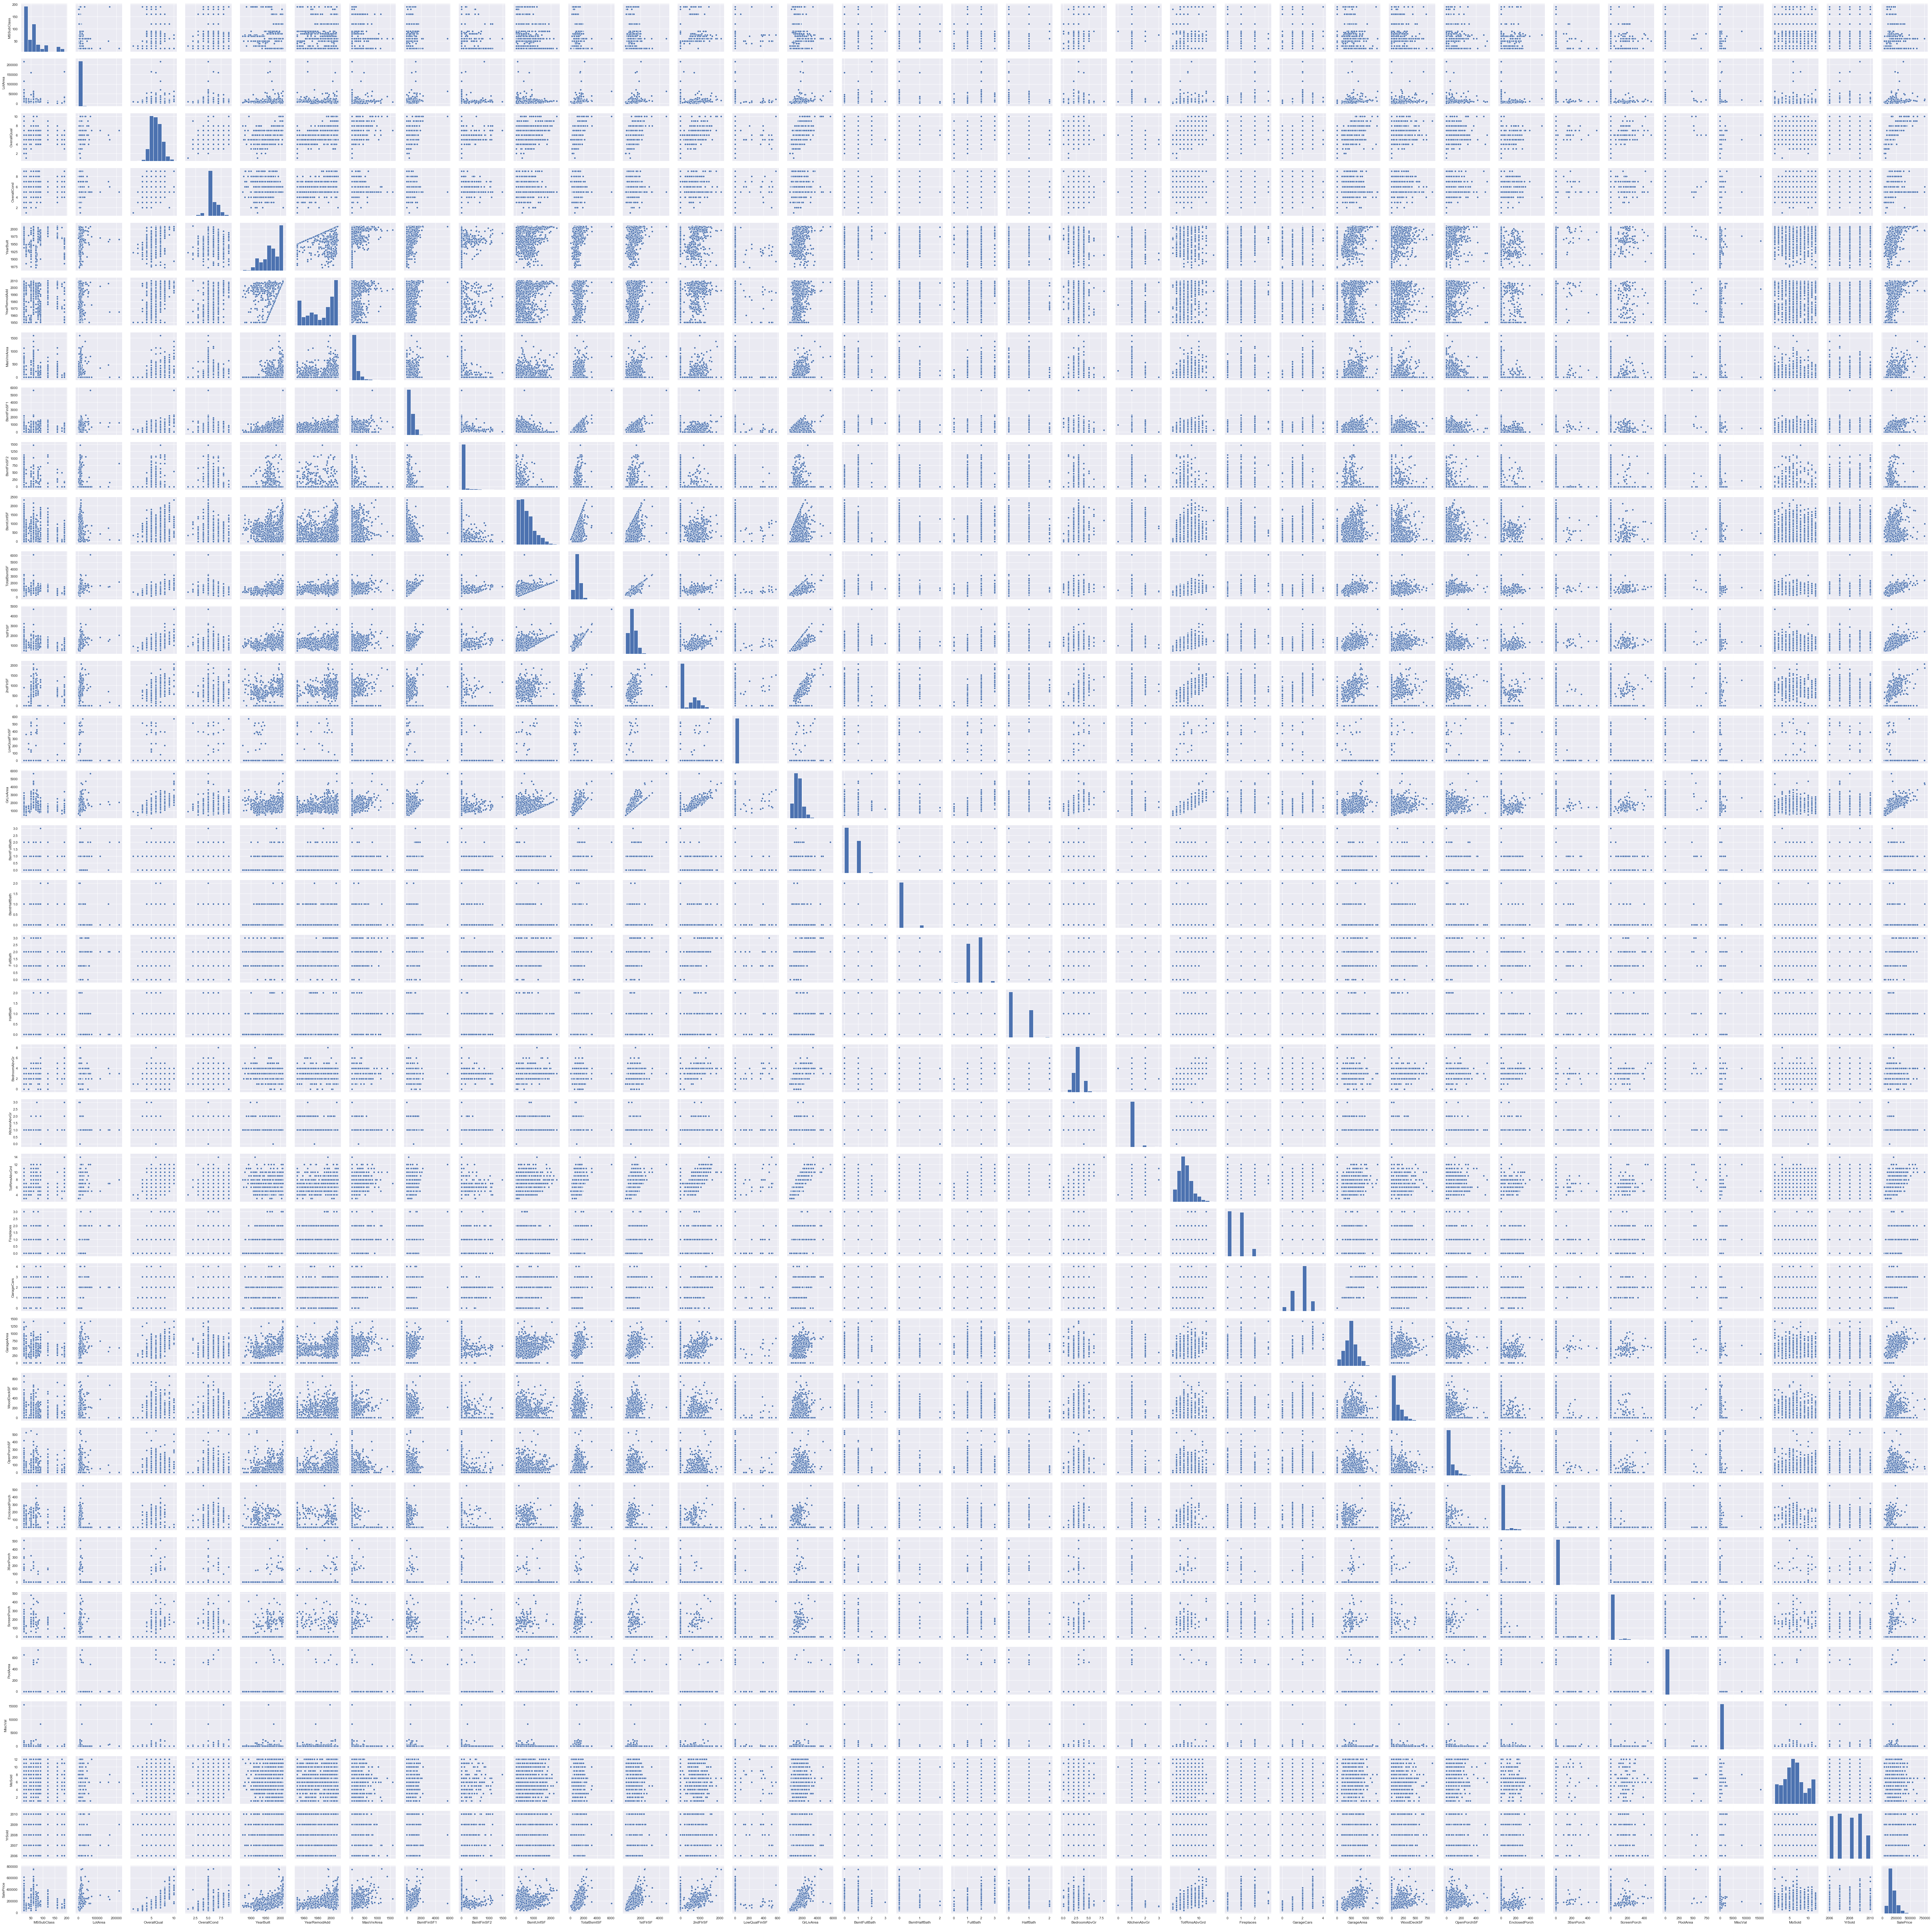

In [15]:
sns.pairplot(data)

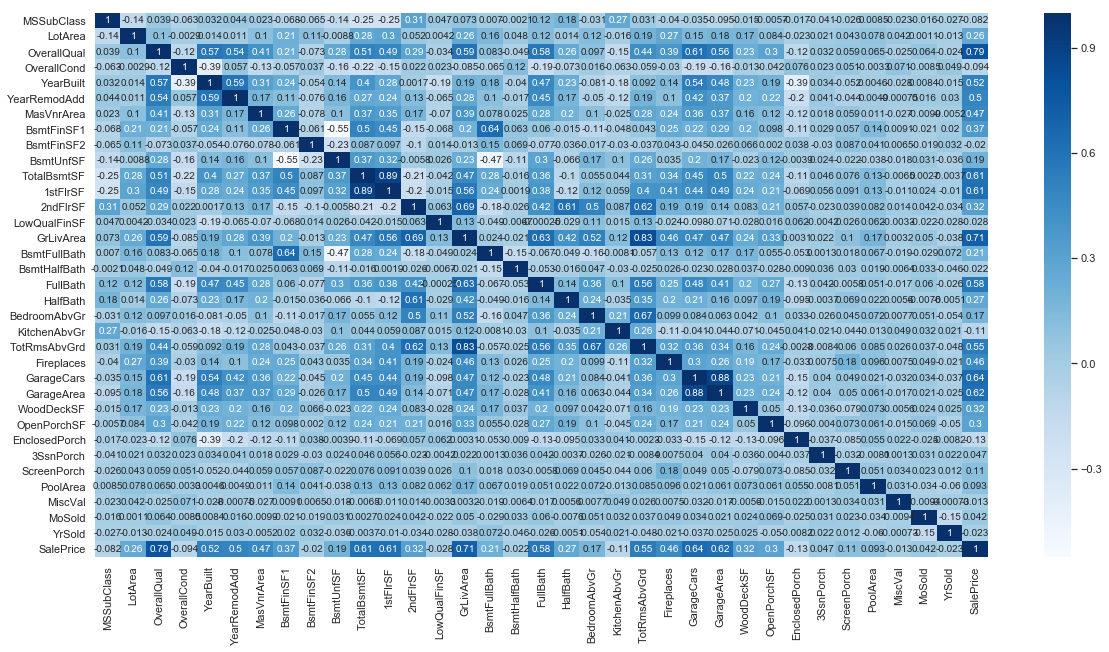

In [18]:
plt.figure(figsize=(20,10)) #searching for correlations
sns.heatmap(data.corr(),annot=True,cmap='Blues')

# Preprocssing 

In [21]:
data=pd.get_dummies(data,drop_first=True)

In [23]:
data=data.sort_values(by='SalePrice')

In [25]:
data=data.reset_index(drop=True)

In [28]:
x=data.drop('SalePrice',axis=1)
y=data['SalePrice']

### Linear regression with StatsModels

In [31]:
import statsmodels.api as sm
x1=sm.add_constant(x)
regressor_OLS=sm.OLS(y,x1).fit()


In [32]:
predictions_OLS=regressor_OLS.predict(x1)


In [33]:
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     74.11
Date:                Mon, 06 Sep 2021   Prob (F-statistic):               0.00
Time:                        00:53:00   Log-Likelihood:                -16078.
No. Observations:                1412   AIC:                         3.257e+04
Df Residuals:                    1203   BIC:                         3.367e+04
Df Model:                         208                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -1.001e+06   1.07e+06     -0.936      0.349    -3.1e+06     1.1e+06
MSSubClass              -40.7049     85.301     -0.477      0.633    -208.060     126.650
LotArea                   0.7524      0.110      6.867      0.000       0.537       0.967
OverallQual            6711.2967   1031.075      6.509      0.000    4688.392    8734.202
OverallCond            5894.6659    886.961      6.646      0.000    4154.503    7634.829
YearBuilt               315.0127     75.386      4.179      0.000     167.110     462.916
YearRemodAdd            105.8290     56.414      1.876      0.061      -4.851     216.509
MasVnrArea               21.2497      5.841      3.638      0.000       9.790      32.709
BsmtFinSF1               16.6276      2.924      5.687      0.000      10.891      22.364
BsmtFinSF2                7.2916      6.051      1.205      0.228      -4.580      19.164
BsmtUnfSF                -2.1389      2.800     -0.764      0.445      -7.632       3.354
TotalBsmtSF              21.7802      4.249      5.126      0.000      13.444      30.117
1stFlrSF                 11.3604      6.310      1.800      0.072      -1.020      23.740
2ndFlrSF                 33.5474      5.420      6.189      0.000      22.913      44.182
LowQualFinSF             -9.3894     13.426     -0.699      0.484     -35.730      16.951
GrLivArea                35.5181      5.418      6.555      0.000      24.888      46.148
BsmtFullBath            735.7834   1997.872      0.368      0.713   -3183.918    4655.484
BsmtHalfBath          -1071.8933   3057.266     -0.351      0.726   -7070.059    4926.272
FullBath               3110.9277   2243.401      1.387      0.166   -1290.487    7512.342
HalfBath                380.7014   2124.980      0.179      0.858   -3788.377    4549.780
BedroomAbvGr          -3389.4577   1401.919     -2.418      0.016   -6139.936    -638.980
KitchenAbvGr          -1.367e+04   5819.193     -2.349      0.019   -2.51e+04   -2250.514
TotRmsAbvGrd           1293.0377    969.716      1.333      0.183    -609.485    3195.560
Fireplaces             2751.4469   1360.704      2.022      0.043      81.831    5421.063
GarageCars             3173.9549   2190.727      1.449      0.148   -1124.116    7472.026
GarageArea               14.6705      7.551      1.943      0.052      -0.143      29.484
WoodDeckSF                9.8093      5.887      1.666      0.096      -1.740      21.359
OpenPorchSF               3.9948     11.678      0.342      0.732     -18.917      26.906
EnclosedPorch             5.3126     12.707      0.418      0.676     -19.617      30.243
3SsnPorch                26.4338     22.784      1.160      0.246     -18.268      71.135
ScreenPorch              34.6632     12.261      2.827      0.005      10.607      58.719
PoolArea               

# Continuing the Preprocessing 

In [34]:
from sklearn.preprocessing import StandardScaler  #normalizing the values 
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

C:\Users\20115\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\20115\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [35]:
from sklearn.model_selection import train_test_split  #splitting the values into train & test
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.3)

### Linear Regression with Sklearn

In [37]:
from sklearn.linear_model import LinearRegression #fitting the model 
linear_regressor=LinearRegression()
linear_regressor.fit(x_train,y_train)
linear_predictions=linear_regressor.predict(x_test)

In [40]:
from sklearn.metrics import r2_score  #choosing the models kpis
from sklearn.metrics import mean_absolute_error


In [43]:
r2_score_linear=r2_score(y_test,linear_predictions)  #finding out the model evaluation
MAE_linear=mean_absolute_error(y_test,linear_predictions)
print('For the linear regression \n The r_squared ={} \n The mean_squred_error={}'.format(r2_score_linear,MAE_linear))

For the linear regression 
 The r_squared =-3.5470701416151735e+21 
 The mean_squred_error=247783601632767.7


### Decision Tree with Sklearn

In [44]:
from sklearn.tree import DecisionTreeRegressor
Tree_regressor=DecisionTreeRegressor()
Tree_regressor.fit(x_train,y_train)
Tree_predictions=Tree_regressor.predict(x_test)

In [46]:
r2_score_Tree=r2_score(y_test,Tree_predictions)
MAE_tree=mean_absolute_error(y_test,Tree_predictions)
print('For the Decision Trees Model \n The r_squared={} \n The Mean squared error={}'.format(r2_score_Tree,MAE_tree))

For the Decision Trees Model 
 The r_squared=0.667529783178339 
 The Mean squared error=30177.087264150945


### Random Forest with Sklearn

In [49]:
from sklearn.ensemble import RandomForestRegressor
Forest_regressor=RandomForestRegressor()
Forest_regressor.fit(x_train,y_train)
Forest_predictions=Forest_regressor.predict(x_test)

C:\Users\20115\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [51]:
r2_score_Forest=r2_score(y_test,Forest_predictions)
MAE_forest=mean_absolute_error(y_test,Forest_predictions)
print('For the Random Forest Model \n The r_squared={} \n The Mean squared error={}'.format(r2_score_Forest,MAE_forest))

For the Random Forest Model 
 The r_squared=0.8259555350763514 
 The Mean squared error=20443.303066037737


In [60]:
y_test=y_test.reset_index(drop=True) #reseting the index of y_test to avoid null values 

### Making a table of predictions to make comparisions easy

In [61]:
predictions=pd.DataFrame()
predictions['Linear Model']=linear_predictions
predictions['Tree Model']=Tree_predictions
predictions['Forest Model']=Forest_predictions
predictions['Actual values']=y_test

In [62]:
predictions.head()

Linear Model  Tree Model  Forest Model  Actual values
0  297818.28125    315750.0      282737.2         295000
1  268336.28125    264132.0      279778.0         340000
2  106358.28125    129500.0      135425.0         129000
3  115440.28125    136500.0      139676.0         123000
4  181027.28125    136000.0      189890.0         169000

### Making a table of Kpis for easier comparison

In [80]:
KPIs=pd.DataFrame()
KPIs['Model']=['Linear','Decision Tree','Random Forest']
KPIs['R_squared']=[r2_score_linear,r2_score_Tree,r2_score_Forest]
KPIs['Mean Absolute Error']=[MAE_linear,MAE_tree,MAE_forest]

In [83]:

KPIs

Model     R_squared  Mean Absolute Error
0         Linear -3.547070e+21         2.477836e+14
1  Decision Tree  6.675298e-01         3.017709e+04
2  Random Forest  8.259555e-01         2.044330e+04

# Visualization 

### Distribution Plot

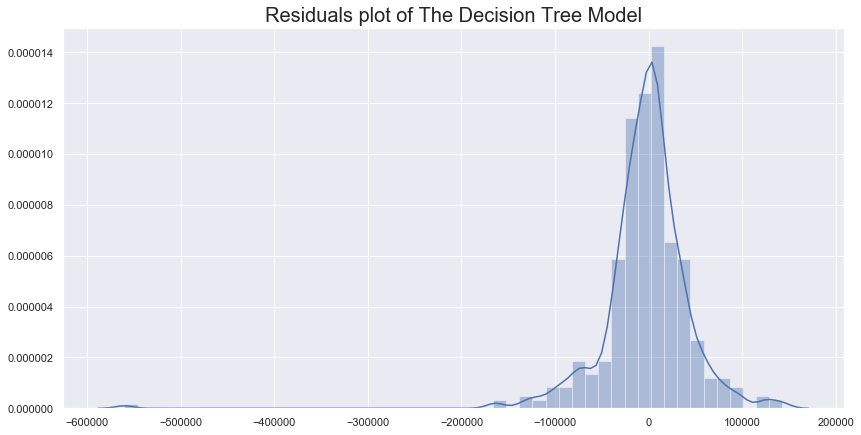

In [131]:
figure=plt.figure(figsize=(14,7))
sns.distplot(predictions['Tree Model']-predictions['Actual values'])
plt.title('Residuals plot of The Decision Tree Model',fontsize=20)
plt.show()
figure.savefig('Residuals plot of The Decision Tree Model.png',bbox_inches='tight')


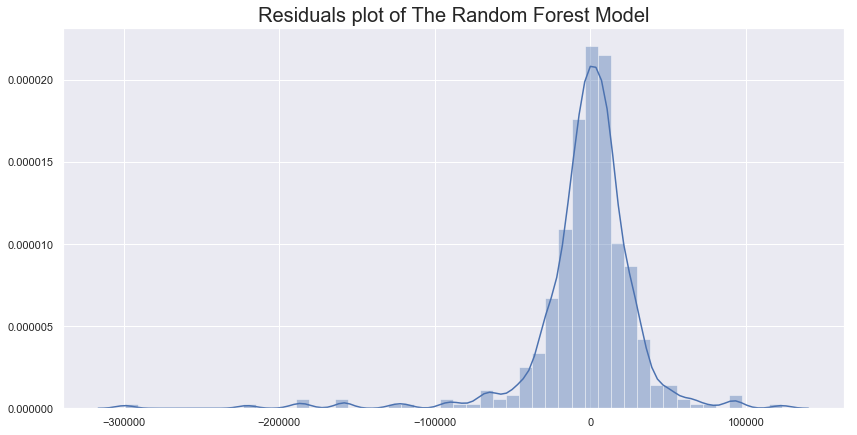

In [132]:
figure=plt.figure(figsize=(14,7))
sns.distplot(predictions['Forest Model']-predictions['Actual values'])
plt.title('Residuals plot of The Random Forest Model',fontsize=20)
plt.show()
figure.savefig('Residuals plot of The Random Forest Model.png',bbox_inches='tight')


### Scatter plot

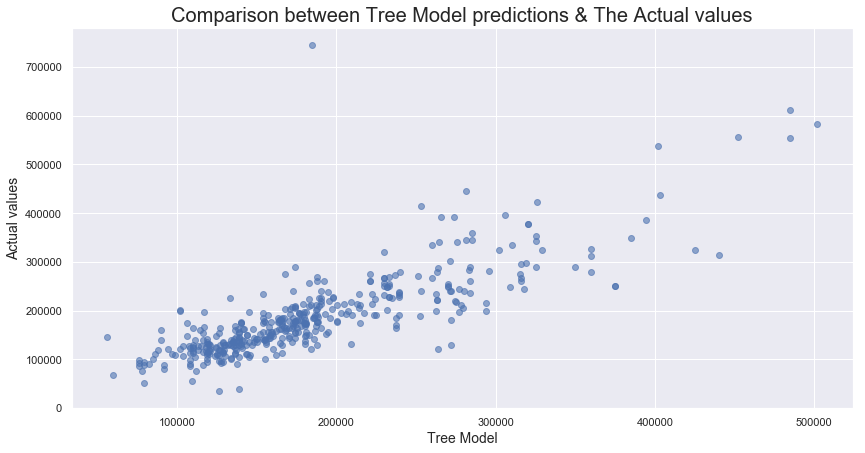

In [135]:
figure=plt.figure(figsize=(14,7))
plt.scatter(predictions['Tree Model'],predictions['Actual values'],alpha=0.6)
plt.title('Comparison between Tree Model predictions & The Actual values',fontsize=20)
plt.xlabel('Tree Model',fontsize=14)
plt.ylabel('Actual values',fontsize=14)

plt.show()
figure.savefig('Comparison between Tree Model predictions & The Actual values.png',bbox_inches='tight')



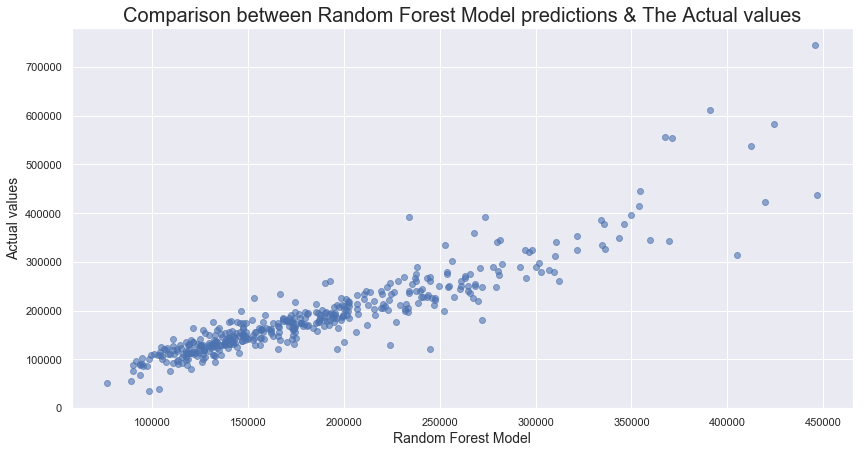

In [136]:
figure=plt.figure(figsize=(14,7))
plt.scatter(predictions['Forest Model'],predictions['Actual values'],alpha=0.6)
plt.title('Comparison between Random Forest Model predictions & The Actual values',fontsize=20)
plt.xlabel('Random Forest Model',fontsize=14)
plt.ylabel('Actual values',fontsize=14)

plt.show()
figure.savefig('Comparison between Random Forest Model predictions & The Actual values.png',bbox_inches='tight')


In [113]:
KPIs_without_linear=KPIs.iloc[1:,:]
KPIs_without_linear

Model  R_squared  Mean Absolute Error
1  Decision Tree   0.667530         30177.087264
2  Random Forest   0.825956         20443.303066

### Bar Plot

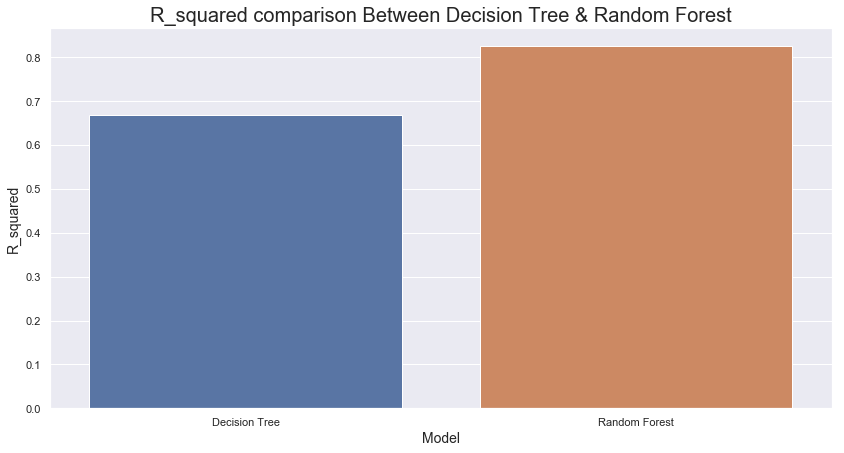

In [134]:
figure=plt.figure(figsize=(14,7))
sns.barplot(KPIs_without_linear['Model'],KPIs_without_linear['R_squared'])
plt.title('R_squared comparison Between Decision Tree & Random Forest',fontsize=20)
plt.xlabel('Model',fontsize=14)
plt.ylabel('R_squared',fontsize=14)
plt.show()
figure.savefig('R_squared comparison Between Decision Tree & Random Forest.png',bbox_inches='tight')


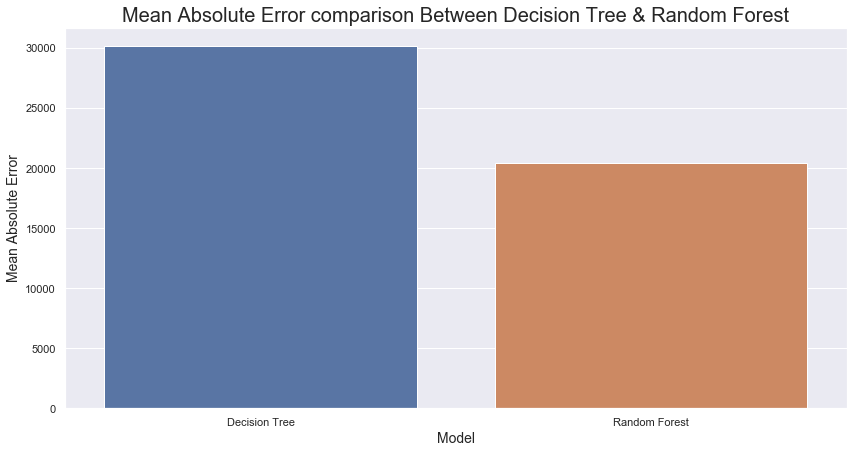

In [133]:
figure=plt.figure(figsize=(14,7))
sns.barplot(KPIs_without_linear['Model'],KPIs_without_linear['Mean Absolute Error'])
plt.title('Mean Absolute Error comparison Between Decision Tree & Random Forest',fontsize=20)
plt.xlabel('Model',fontsize=14)
plt.ylabel('Mean Absolute Error',fontsize=14)
plt.show()
figure.savefig('Mean Absolute Error comparison Between Decision Tree & Random Forest.png',bbox_inches='tight')
